# Step 1: Importing Required Libraries
This section imports the necessary Python libraries for data handling, visualization, and building the regression model.

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Step 2: Loading the Dataset
Load the dataset into a Pandas DataFrame for analysis. The dataset contains two columns:  
- `YearsExperience`: The independent variable (X).  
- `Salary`: The dependent variable (Y). 

In [68]:
data = pd.read_csv("Salary_Data.csv")

# Step 3: Exploring the Dataset
- Display the first few rows of the dataset to understand its structure.  
- Check for missing values and perform data cleaning if necessary.  

In [69]:
data.head(6)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0


In [70]:
# Check for null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 612.0 bytes


# Step 4: Visualizing the Data
Use a scatter plot to visualize the relationship between `YearsExperience` and `Salary`.


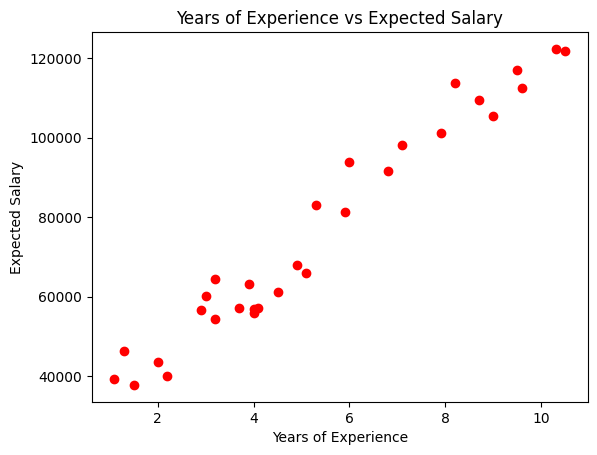

In [71]:
plt.scatter(data['YearsExperience'], data['Salary'], color='red')
plt.title('Years of Experience vs Expected Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Expected Salary')
plt.show()

# Step 5: Splitting the Dataset into Training and Testing Sets
- Extract the independent variable (`YearsExperience`) as `X`.  
- Extract the dependent variable (`Salary`) as `y`.  
These variables will be used to train the regression model.
Split the dataset into training and testing sets to evaluate the model's performance.  
Example: 80% of the data for training, 20% for testing.

In [72]:
x = data[['YearsExperience']]
y = data['Salary']

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# Step 6: Training the Model
Fit a Simple Linear Regression model to the training data using scikit-learn's `LinearRegression`.


In [74]:
#creating an instance
model = LinearRegression()

In [75]:
model.fit(x_train,y_train)

LinearRegression()

# Step 7: Visualizing the Regression Line
- Plot the training data points.
- Overlay the regression line fitted by the model.


In [76]:
#predictions from model by passing training data
y_pred = model.predict(x_train)

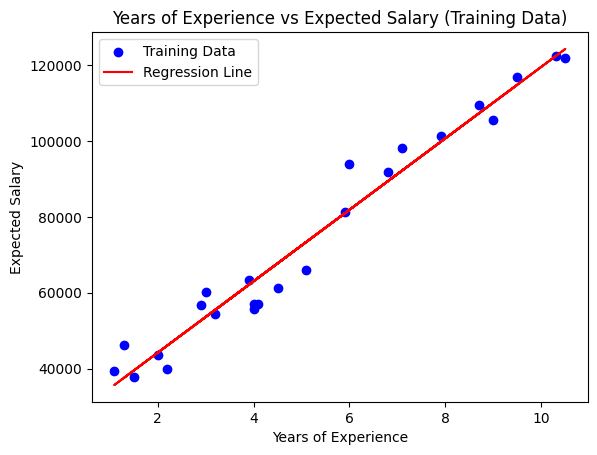

In [77]:
# Plotting training data and regression line
plt.scatter(x_train, y_train, color='blue', label='Training Data')
plt.plot(x_train, y_pred, color='red', label='Regression Line')
plt.title('Years of Experience vs Expected Salary (Training Data)')
plt.xlabel('Years of Experience')
plt.ylabel('Expected Salary')
plt.legend()
plt.show()

# Step 8: Evaluating the Model

Once the model is trained, we evaluate its performance using the test data. In this case, we'll use the **R-squared** value to assess how well the model explains the variance in the target variable.

### R-squared (Coefficient of Determination)
The **R-squared** value indicates the proportion of the variance in the dependent variable (e.g., salary) that is explained by the independent variables (e.g., years of experience). An R-squared value closer to 1 indicates that the model fits the data well.


In [78]:
r2 = model.score(x_test, y_test)

In [79]:
print(f"R-squared: {r2}")

R-squared: 0.9024461774180497


# Step 8: Making Predictions
Use the trained model to predict salaries for the test set and compare them with the actual values.


In [80]:
y_pred = model.predict(x_test) #predicted values

In [81]:
# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the first few rows of the comparison
print(comparison_df.head())

      Actual      Predicted
27  112635.0  115790.210113
15   67938.0   71498.278095
23  113812.0  102596.868661
17   83088.0   75267.804224
8    64445.0   55477.792045


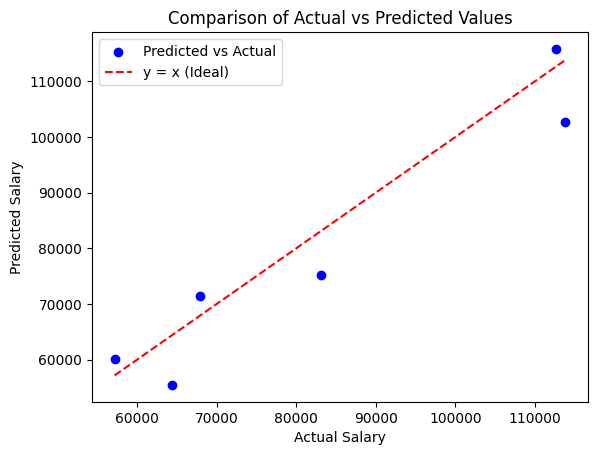

In [82]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred, c='blue', label='Predicted vs Actual')

# Add the reference line (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='y = x (Ideal)')

# Add labels and title
plt.title("Comparison of Actual vs Predicted Values")
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.legend()

# Show the plot
plt.show()


## Conclusion

### Model Performance
The **Simple Linear Regression** model was used to predict the salary based on years of experience. The evaluation metrics showed the following results:
- **R-squared**: 0.90, which suggests that the model explains 90% of the variance in salary based on years of experience. This is a relatively good fit, but there is still some room for improvement.

### Scatter Plot Insights
The scatter plot revealed that most of the predicted values were close to the ideal **y = x** line, suggesting that the model's predictions were fairly accurate for the majority of data points. There were a few outliers, which could be explored further to understand why the model mispredicted those specific cases.

### Areas for Improvement
- The model could be improved by considering additional features such as industry type, education level, or location, which may have an impact on salary beyond just years of experience.
- Further experimentation with different regression techniques or using a **polynomial regression** approach may also yield better predictions if the relationship between experience and salary is non-linear.

### Future Steps
In future steps, it would be helpful to collect more data and investigate the effects of other features that could influence salary prediction. Additionally, experimenting with **cross-validation** and testing different machine learning algorithms could improve the model's accuracy.

Overall, this project provided useful insights into the relationship between years of experience and salary, demonstrating how a simple regression model can offer valuable predictions with further room for refinement.


In [85]:
import joblib

# Save the trained model
joblib.dump(model, 'SLReg.joblib')

['SLReg.joblib']